# Your first embedding

## Exercise objectives:

- Run your first RNN for NLP
- Get a first taste of what an embedding is

<hr>

Words are not something you can easily feed to a Neural Network. For this reason, we have to convert them to something more meaningful. 

And this is exactly what _Embeddings_ are for! They map any word onto a vectorial representation (this a fancy way to represent each word with a vector ;) ). For instance, the word `dog` can be represented by the vector $(w_1, w_2, ..., w_n)$ in the embedding space, and we will learn the weights $(w_k)_k$.

So let's just do it.

# The data

❓ **Question** ❓ Let's first load the data. You don't have to understand what is going on in the function, it does not matter here.

⚠️ **Warning** ⚠️ The `load_data` function has a `percentage_of_sentences` argument. Depending on your computer, there are chances that too many sentences will make your compute slow down, or even freeze - your RAM can overflow. For that reason, **you should start with 10% of the sentences** and see if your computer handles it. Otherwise, rerun with a lower number. 

⚠️ **DISCLAIMER** ⚠️ **No need to play _who has the biggest_ (RAM) !** The idea is to get to run your models quickly to prototype. Even in real life, it is recommended that you start with a subset of your data to loop and debug quickly. So increase the number only if you are into getting the best accuracy. 

In [10]:
###########################################
### Just run this cell to load the data ###
###########################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)

Now that you have loaded the data, let's check it out!

❓ **Question** ❓ You can play with the data here. In particular, `X_train` and `X_test` are lists of sentences. Let's print some of them, with their respective label stored in `y_train` and `y_test`.

In [11]:
import numpy as np

In [12]:
count = 0
for i in range(len(X_train)):
    if count < 5:
        i = np.random.randint(0,len(X_train))
        print(f"Film rating: {y_train[i]}, description: {' '.join(X_train[i])}")
        count += 1


Film rating: 0, description: when i got this movie free from my job along with three other similar movies i watched then with very low expectations now this movie isn't bad per se you get what you pay for it is a tale of love betrayal lies sex scandal everything you want in a movie definitely not a hollywood blockbuster but for cheap thrills it is not that bad i would probably never watch this movie again in a nutshell this is the kind of movie that you would see either very late at night on a local television station that is just wanting to take up some time or you would see it on a sunday afternoon on a local television station that is trying to take up some time despite the bad acting cliché lines and sub par camera work i didn't have the desire to turn off the movie and pretend like it never popped into my dvd player the story has been done many times in many movies this one is no different no better no worse br br just your average movie
Film rating: 1, description: yes it was a l

**LABELS**: the task is a binary classification problem:
- label 0️⃣ corresponds to a <font color=red>negative</font> movie review
- label 1️⃣ corresponds to a <font color=green>positive</font> movie review

**INPUTS**: 
- 🧹 The data has been partially cleaned! So you don't have to worry about it in this exercise. 
- ❗️ But don't forget this step in real-life challenges. 

Remember that words are not computer-compatible materials? You have to tokenize them!

❓ **Question** ❓ Run the following cell to tokenize your sentences

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set!
# This tokenization also lowercases your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)

# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

❓ **Question** ❓ Print some of the tokenized sentences to be sure you got what you expected

In [14]:
count = 0
for i in range(len(X_train_token)):
    if count < 5:
        i = np.random.randint(0,len(X_train_token))
        print(f'Index: {X_train_token.index(X_train_token[i])}, Tokenized words: {X_train_token[i]}')
        count += 1

Index: 1764, Tokenized words: [21, 52, 233, 1711, 15580, 2371, 37, 115, 2, 3349, 37, 47, 522, 370, 1, 287, 182, 11690, 4, 16104, 16105, 9750, 26306, 7174, 15816, 3, 1146, 7459, 9890, 24, 29, 49, 17, 1, 64, 6, 21, 52, 206]
Index: 927, Tokenized words: [1041, 9791, 3304, 12916, 220, 160, 1222, 21697, 182, 4207, 5386, 2252, 21698, 21699, 5827, 2495, 21700, 4988, 14647, 7, 7, 3093, 310, 153, 79, 247, 5723, 6, 157, 8, 2, 2300, 449, 3, 10, 215, 197, 149, 1348, 185, 38, 368, 1831, 125, 1, 1326, 45, 5, 280, 299, 1, 2828, 16, 1, 322, 4, 23, 2694, 2205, 49, 247, 489, 274, 31, 3353, 1, 5687, 21701, 4988, 14647, 1, 663, 1549, 1591, 24, 2251, 2687, 230, 32, 328, 5, 3566, 1, 10184, 8665, 119, 646, 29, 499, 54, 5, 1, 4316, 4, 1, 439, 30, 21702, 21703, 3565, 1135, 7, 7, 11, 1660, 925, 1138, 215, 88, 1023, 10, 45, 2, 90, 15, 229, 271, 213, 72, 564, 1159, 1, 467, 1690, 181, 1488, 778, 726, 59, 303, 2, 346, 212, 470, 426, 35, 1, 439, 83, 451, 204, 81, 14176, 1085, 81, 1226, 6790, 1138, 5720, 14648, 2020,

The dictionary that maps each word to a token can be accessed with `tokenizer.word_index`
    
❓ **Question** ❓ Add a `vocab_size` variable that stores the number of different words (=tokens) in the train set. This is called the _size of the vocabulary_.

In [15]:
vocab_size = len(tokenizer.word_index)

Your `X_train_token` and `X_test_token` contain sequences of different lengths.

<img src="padding.png" alt='Word2Vec' width="700px" />

However, a neural network has to have a tensor as input. For this reason, you have to pad your data.

❓ **Question** ❓  Pad your data with the `pad_sequences` function (documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)). Do not forget about the `dtype` and `padding` keywords (but do not use `maxlen` here).

In [16]:
from tensorflow.keras.utils import pad_sequences

In [17]:
X_train_token_pad = pad_sequences(
    X_train_token,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

X_test_token_pad = pad_sequences(
    X_test_token,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

In [19]:

print(len(X_train_token[1]), len(X_test_token_pad[2]))

112 988


In [21]:
count = 0
for i in range(len(X_train_token)):
    if count < 5:
        i = np.random.randint(0,len(X_train_token))
        print(f'Length of before padded: {len(X_train_token[i])}, after padded: {len(X_test_token_pad[i])}')
        count += 1

Length of before padded: 139, after padded: 988
Length of before padded: 132, after padded: 988
Length of before padded: 140, after padded: 988
Length of before padded: 120, after padded: 988
Length of before padded: 155, after padded: 988


# The RNN

Let's now feed this data to a Recurrent Neural Network.

❓ **Question** ❓ Write a model that has:
- an embedding layer whose `input_dim` is the size of your vocabulary (= your `vocab_size`), and whose `output_dim` is the size of the embedding space you want to have
- a RNN (SimpleRNN, LSTM, GRU) layer
- a Dense layer
- an output layer

⚠️ **Warning** ⚠️ Here, you don't need a masking layer. Why? Because `layers.Embedding` has a argument to do that directly, which you have to set with `mask_zero=True`. That also means that your data **HAS TO** be padded with **0** (which is the default behavior). See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) to understand how it **impacts** the `input_dim`.

<details>
    <summary>💡 Hint</summary>

`input_dim` should equal size of vocabulary + 1

</details>

Compile it with the appropriate arguments

In [22]:
from tensorflow.keras.layers import Normalization, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping


In [23]:
len(X_test_token_pad)

2500

In [24]:
def create_embedded_model():

    # initializing the model
    model = Sequential()

    # adding the embedding of our dictionary
    model.add(layers.Embedding(
                        input_dim = vocab_size+1,
                        input_length = len(X_train_token_pad[0]),
                        output_dim = 20
                 ))
    # adding an LSTM model
    model.add(layers.LSTM(units=20,activation='tanh'))

    # adding a hidden layer
    model.add(layers.Dense(30, activation='relu'))

    # adding an output layer
    model.add(layers.Dense(1,activation='sigmoid'))

    #compiling the model
    model.compile(
        loss = "binary_crossentropy",
        optimizer = 'adam',
        metrics = ['accuracy']
    )

    return model

❓ **Question** ❓ Look at the number of parameters in your RNN. 

In [25]:
model = create_embedded_model()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1164, 20)          608400    
                                                                 
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 30)                630       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 612,341
Trainable params: 612,341
Non-trainable params: 0
_________________________________________________________________


❓ Double-check that the number of parameters in your embedding layer is equal to the (number of words in your vocabulary + 1 for the masking value) $\times$  the dimension of your embedding.

In [27]:
manual_check = (vocab_size+1) * 20

print(manual_check)

608400


❓ **Question** ❓ Start fitting your model with 20 epochs, with an early stopping criterion whose patience is equal to 4.

⚠️ **Warning** ⚠️ You might see that it takes a lot of time! 

**So stop it after a couple of iterations!**

In [28]:
# fitting the model

def fit_model(model):

    es = EarlyStopping(patience=4, restore_best_weights=True)

    history = model.fit(
        X_train_token_pad,
        y_train,
        validation_split = 0.2,
        batch_size = 32,
        epochs=20,
        callbacks = [es]
    )
    return history

history = fit_model(model)

Epoch 1/20
63/63 [==============================] - 9s 126ms/step - loss: 0.6922 - accuracy: 0.5200 - val_loss: 0.6868 - val_accuracy: 0.5920
Epoch 2/20
63/63 [==============================] - 7s 116ms/step - loss: 0.5855 - accuracy: 0.7455 - val_loss: 0.5355 - val_accuracy: 0.7440
Epoch 3/20
63/63 [==============================] - 7s 114ms/step - loss: 0.2429 - accuracy: 0.9270 - val_loss: 0.4440 - val_accuracy: 0.8080
Epoch 4/20
63/63 [==============================] - 7s 114ms/step - loss: 0.0640 - accuracy: 0.9835 - val_loss: 0.5058 - val_accuracy: 0.8040
Epoch 5/20
63/63 [==============================] - 7s 114ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 0.5604 - val_accuracy: 0.8060
Epoch 6/20
63/63 [==============================] - 7s 115ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.6700 - val_accuracy: 0.7780
Epoch 7/20
63/63 [==============================] - 7s 115ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 0.8020


Let's not waste too much time just staring at our screen or having coffees. It is too early to start having breaks ;)

❓ **Question** ❓ We will reduce the computational time. To start, let's first look at how many words there are in the different sentences of your train set (Just run the following cell).

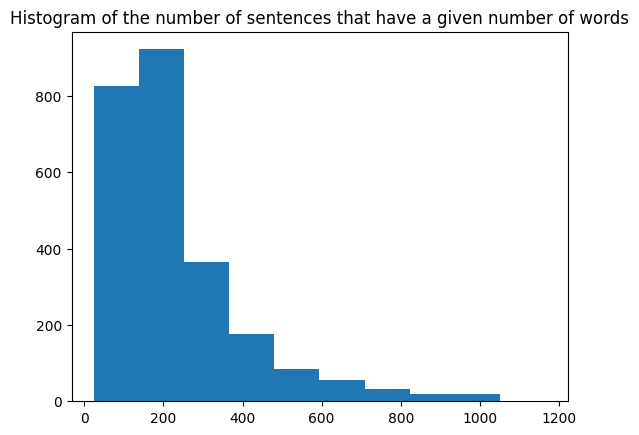

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)


You will probably see that 90 to 95% of your sentences have less than 300 words. And very few have more than 1000.

However, as you didn't use `maxlen` in your padding above, your input tensor has a dimension equal to the length of the sentence that has the maximum number of words.

Now, let's look at how this affects the padding: 


<img src="tensor_size.png" alt='Word2Vec' width="700px" />

Because of a few of very long sentences, one dimension of your tensor is equal to around 1000. However, most of the sentences with ~200 words have just padded values that are useless.

So your tensor is mostly useless information, which still adds time to the training process.

But what if you pad the data to a maximum length (`maxlen`) of say 200 (words)?
- First, that would increase the convergence and you would not need to stare at your screen while waiting for the algorithm to converge
- But in essence, do you really lose that much information? Do you think that you often need more than 200 words (up to 1000) to tell whether or not a sentence is positive of negative?

❓ **Question** ❓ For all these reasons, re-do your padding using the `maxlen` keyword and retrain the model!  See how much faster it is now - without hurting the performance ;)

In [30]:
X_train_token_pad_200 = pad_sequences(
    X_train_token,
    maxlen=200,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

X_test_token_pad_200 = pad_sequences(
    X_test_token,
    maxlen=200,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

In [41]:

def fit_model_200(model):

    es = EarlyStopping(patience=4, restore_best_weights=True)

    history = model.fit(
        X_train_token_pad_200,
        y_train,
        validation_split = 0.2,
        batch_size = 32,
        epochs=20,
        callbacks = [es]
    )
    return history

In [37]:
len(X_train_token)

2500

In [38]:
def create_embedded_model_200():

    # initializing the model
    model = Sequential()

    # adding the embedding of our dictionary
    model.add(layers.Embedding(
                        input_dim = vocab_size+1,
                        input_length = 200,
                        output_dim = 20
                 ))
    # adding an LSTM model
    model.add(layers.LSTM(units=20,activation='tanh'))

    # adding a hidden layer
    model.add(layers.Dense(30, activation='relu'))

    # adding an output layer
    model.add(layers.Dense(1,activation='sigmoid'))

    #compiling the model
    model.compile(
        loss = "binary_crossentropy",
        optimizer = 'adam',
        metrics = ['accuracy']
    )

    return model

In [42]:
model_eff = create_embedded_model_200()

In [43]:
history_eff = fit_model_200(model_eff)

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 0.6924 - accuracy: 0.5140 - val_loss: 0.6894 - val_accuracy: 0.6240
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.5934 - accuracy: 0.7380 - val_loss: 0.4455 - val_accuracy: 0.8040
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 0.2205 - accuracy: 0.9275 - val_loss: 0.4327 - val_accuracy: 0.8120
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0629 - accuracy: 0.9825 - val_loss: 0.5156 - val_accuracy: 0.7940
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.5110 - val_accuracy: 0.8340
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.6011 - val_accuracy: 0.8280
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7614 - val_accuracy: 0.8260


In [52]:
results = model.evaluate(X_test_token_pad,y_test)

results_eff = model_eff.evaluate(X_test_token_pad_200,y_test)

print(f"Accuracy full length: {results[1]},\
-------------------\
Accuracy 200 length: {results_eff[1]}")

79/79 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8220
Accuracy full length: 0.7975999712944031,-------------------Accuracy 200 length: 0.8220000267028809


🏁 Nice, you are now able to use `Tokenizer` and `pad_sequences`

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!